## item-based Collaborative Filtering
thanks to [@abhilampard](https://www.kaggle.com/abhikaggle8/item-based-cf-movie-recommender)

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
%matplotlib inline

In [ ]:
## data-import
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip-code']
users = pd.read_csv('ml-100k/u.user', names=u_cols, sep="|", encoding='latin-1',parse_dates=True)
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep="\t", names=r_cols, encoding='latin-1')
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep="|", names=m_cols, usecols=range(5), encoding='latin-1')
movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

df.head(2)


## stats

In [15]:
## movie-ratings

movie_stats = df.groupby('title').agg({"rating": [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [19]:
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761

Text(0.5, 0, 'Rating (Out of 5)')

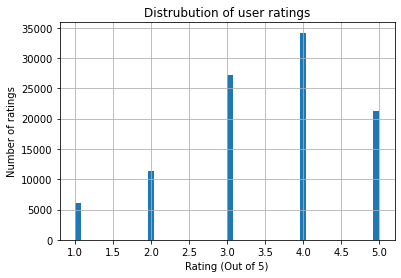

In [29]:
ratings.rating.hist(bins=50)
plt.title("Distrubution of user ratings")
plt.ylabel("Number of ratings")
plt.xlabel("Rating (Out of 5)")

Text(0.5, 0, 'Age')

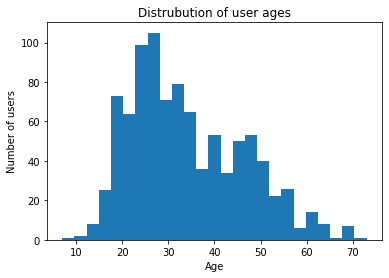

In [30]:
users.age.plot.hist(bins=25)
plt.title("Distrubution of user ages")
plt.ylabel("Number of users")
plt.xlabel("Age")

## pivot table

In [33]:
ratings_matrix = ratings.pivot_table(index=['movie_id'], columns=['user_id'], values='rating').reset_index(drop=True)
ratings_matrix.fillna(0, inplace=True)
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## cosine similarity

In [36]:
movie_similarity = 1 - pairwise_distances(ratings_matrix, metric='cosine')
np.fill_diagonal(movie_similarity, 0)

In [47]:
ratings_matrix = pd.DataFrame(movie_similarity)
print("expect: (n, n), n=movies_length. Now movies_length is", movies.shape[0])
print("tobe:", ratings_matrix.shape)
ratings_matrix.head(3)

expect: (n, n), n=movies_length. Now movies_length is 1682
tobe: (1682, 1682)


,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.0,0.0,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.0,0.0,0.032292,0.0,0.0,0.0,0.000000,0.096875


## recommender engine

In [ ]:
try:
    user_input = "Speed (1994)"
    movie_id = movies[movies["title"] == user_input].index.tolist()[0]

    movies


except:
    print("not found")

In [57]:
user_input = "Speed (1994)"
movie_id = movies[movies["title"] == user_input].index.tolist()[0]
movies["similarity"] = ratings_matrix[movie_id]



In [58]:
movies.columns["movie_id","title","release_date","similarity"]
mocvies.head(2)

SyntaxError: invalid syntax (<ipython-input-58-daf72d1f50d3>, line 1)

In [53]:
movies

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...
